In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

In [3]:
#Import csv
c2019 = pd.read_csv('C:/Users/hanna/Documents/CSV/CRIMESDATA/LA_2019.csv', sep = ',')
c2020 = pd.read_csv('C:/Users/hanna/Documents/CSV/CRIMESDATA/LA_2020.csv', sep = ',')
c2021 = pd.read_csv('C:/Users/hanna/Documents/CSV/CRIMESDATA/LA_2021.csv', sep = ',')


In [4]:
c2019.dtypes

Unnamed: 0              int64
INCIDENT_DATE          object
CATEGORY               object
STAT                    int64
STAT_DESC              object
ADDRESS                object
STREET                 object
CITY                   object
ZIP                   float64
INCIDENT_ID            object
REPORTING_DISTRICT      int64
GANG_RELATED           object
UNIT_ID                object
UNIT_NAME              object
LONGITUDE             float64
LATITUDE              float64
PART_CATEGORY           int64
dtype: object

In [5]:
df = pd.concat([c2019, c2020, c2021], ignore_index=True).reset_index(drop=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], format = '%Y/%m/%d %H:%M:%S')

df = pd.DataFrame(df)
df[['CATEGORY', 'STAT_DESC', 'ADDRESS', 'STREET', 'CITY', 'INCIDENT_ID', 'GANG_RELATED', 'UNIT_ID', 'UNIT_NAME']] = df[['CATEGORY', 'STAT_DESC', 'ADDRESS', 'STREET', 'CITY', 'INCIDENT_ID', 'GANG_RELATED', 'UNIT_ID', 'UNIT_NAME']].astype('string')
df['ZIP'] = df['ZIP'].astype('Int64')
df

,INCIDENT_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,GANG_RELATED,UNIT_ID,UNIT_NAME,LONGITUDE,LATITUDE,PART_CATEGORY
0,2019-01-01 00:00:00,NON-AGGRAVATED ASSAULTS,146,"ASSAULT, NON-AGGRAVATED: DOMESTIC VIOLENCE","44300 CAMELIA ST, LANCASTER, CA",44300 CAMELIA ST,LANCASTER,93535,019-00020-1137,1137,NO,CA0190024,LANCASTER,-118.080,34.688,2
1,2019-01-01 00:00:00,VEHICLE / BOATING LAWS,250,"VEHICLE AND BOATING LAWS: Hit And Run, Misdeme...","16000 PIONEER BLVD, NORWALK, CA",16000 PIONEER BLVD,NORWALK,90650,919-00016-0455,455,NO,CA0190004,NORWALK,-118.083,33.885,2
2,2019-01-01 00:00:00,LARCENY THEFT,89,"GRAND THEFT: Other (From Boat, Plane, Prvt Res...","HAZARD AVE AND FAIRMOUNT ST, LOS ANGELES, CA",HAZARD AVE AND FAIRMOUNT ST,LOS ANGELES,90063,919-00019-0272,272,NO,CA0190002,EAST LOS ANGELES,-118.179,34.046,1
3,2019-01-01 00:00:00,VEHICLE / BOATING LAWS,250,"VEHICLE AND BOATING LAWS: Hit And Run, Misdeme...","14TH ST AND RAILROAD AVE, NEWHALL, CA 91321",14TH ST AND RAILROAD AVE,NEWHALL,91321,919-00021-0625,625,NO,CA0190006,SANTA CLARITA VALLEY,-118.532,34.385,2
4,2019-01-01 00:00:00,LARCENY THEFT,387,"THEFT, PETTY: From Bldgs (Church, School, Rest...","600 N ROBERTSON BLVD, WEST HOLLYWOOD, CA 90069",600 N ROBERTSON BLVD,WEST HOLLYWOOD,90069,919-00103-0972,972,NO,CA0190009,WEST HOLLYWOOD,-118.385,34.083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230320,2021-06-30 23:45:00,LARCENY THEFT,384,"THEFT, PETTY: From Auto (Except Parts/Accessor...","1400 DESCANSO DR, LA CANADA FLINTRIDGE, CA 91011",1400 DESCANSO DR,LA CANADA FLINTRIDGE,91011,921-01103-1264,1264,NO,CA0190012,CRESCENTA VALLEY,-118.209,34.203,1
230321,2021-06-30 23:50:00,NARCOTICS,181,Felony Transport. &/or Sale of Controlled Subs...,"GARVEY AVE AND ROSEMEAD BLVD, ROSEMEAD, CA 91770",GARVEY AVE AND ROSEMEAD BLVD,ROSEMEAD,91770,921-07118-0534,534,NO,CA0190005,TEMPLE,-118.073,34.062,2
230322,2021-06-30 23:59:30,LARCENY THEFT,389,"THEFT, PETTY: Other (From Prvt Res, Boat, Plan...","2700 RAMBLA PACIFICO ST, MALIBU, CA 90265",2700 RAMBLA PACIFICO ST,MALIBU,90265,921-04036-1026,1026,NO,CA0190022,MALIBU/LOST HILLS,-118.646,34.051,1
230323,2021-06-30 23:59:30,FRAUD AND NSF CHECKS,112,FRAUD: Fraud By False Pretenses,"UNK UNKNOWN, LOS ANGELES, CA",UNK UNKNOWN,LOS ANGELES,<NA>,921-09981-0277,277,NO,CA0190002,EAST LOS ANGELES,NaN,NaN,2


In [16]:
df.dtypes

INCIDENT_DATE         datetime64[ns]
CATEGORY                      string
STAT                           int64
STAT_DESC                     string
ADDRESS                       string
STREET                        string
CITY                          string
ZIP                            Int64
INCIDENT_ID                   string
REPORTING_DISTRICT             int64
GANG_RELATED                  string
UNIT_ID                       string
UNIT_NAME                     string
LONGITUDE                    float64
LATITUDE                     float64
PART_CATEGORY                  int64
dtype: object

In [9]:
#Return max length
def get_max_length(lst):
    return len(max(lst, key=len))

#Length of each data type
leng = {}
leng['CATEGORY'] = (get_max_length(df['CATEGORY']))
leng['STAT'] = (get_max_length(df['STAT'].astype(str)))
leng['STAT_DESC'] = (get_max_length(df['STAT_DESC']))
leng['ADDRESS'] = (get_max_length(df['ADDRESS'].astype(str, errors='ignore')))
leng['STREET'] = (get_max_length(df['STREET'].astype(str, errors='ignore')))
leng['CITY'] = (get_max_length(df['CITY'].astype(str, errors='ignore')))
leng['ZIP'] = (get_max_length(df['ZIP'].astype(str, errors='ignore')))
leng['INCIDENT_ID'] = (get_max_length(df['INCIDENT_ID']))
leng['REPORTING_DISTRICT'] = (get_max_length(df['REPORTING_DISTRICT'].astype(str, errors='ignore')))
leng['GANG_RELATED'] = (get_max_length(df['GANG_RELATED'].astype(str)))
leng['UNIT_ID'] = (get_max_length(df['UNIT_ID']))
leng['UNIT_NAME'] = (get_max_length(df['UNIT_NAME']))
#leng['LONGITUDE'] = (get_max_length(df['LONGITUDE'].astype(str, errors='ignore')))
#leng['LATITUDE'] = (get_max_length(df['LATITUDE'].astype(str, errors='ignore')))
leng['PART_CATEGORY'] = (get_max_length(df['PART_CATEGORY'].astype(str)))
print(leng)

{'CATEGORY': 28, 'STAT': 3, 'STAT_DESC': 68, 'ADDRESS': 91, 'STREET': 74, 'CITY': 30, 'ZIP': 7, 'INCIDENT_ID': 14, 'REPORTING_DISTRICT': 4, 'GANG_RELATED': 3, 'UNIT_ID': 9, 'UNIT_NAME': 36, 'PART_CATEGORY': 1}


In [ ]:
#df = df.append({'Name' : 'Ankit', 'Articles' : 97, 'Improved' : 2200}, ignore_index = True)
diff_df = df.groupby(['CATEGORY']['INCIDENT_DATE'].dt.year)['INCIDENT_ID'].count().sort_values(name="count", ascending=True).reset_index()
diff = pd.DataFrame()

#diff['Category'] = df['CATEGORY']



In [4]:
#Category
ct = df.groupby(['CATEGORY'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index(name="count")
ct

,CATEGORY,count
0,LARCENY THEFT,44431
1,VEHICLE / BOATING LAWS,27230
2,NARCOTICS,24995
3,NON-AGGRAVATED ASSAULTS,19058
4,GRAND THEFT AUTO,18805
5,VANDALISM,15328
6,MISDEMEANORS MISCELLANEOUS,13254
7,BURGLARY,12893
8,AGGRAVATED ASSAULT,10028
9,FRAUD AND NSF CHECKS,9356


<AxesSubplot:xlabel='CATEGORY'>

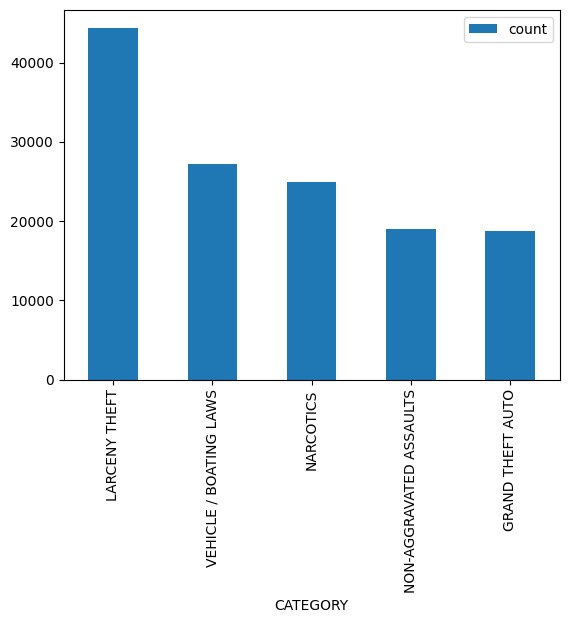

In [16]:
#Top 5 by Category
c = df.groupby(['CATEGORY'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index(name="count").head(5)
c.plot(x = 'CATEGORY', y = 'count', kind = "bar")

<AxesSubplot:xlabel='UNIT_NAME'>

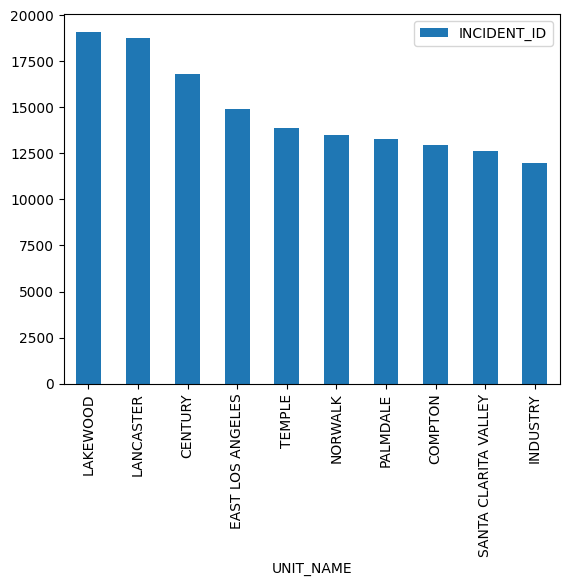

In [41]:
#Count by Station Name
uname = df.groupby(['UNIT_NAME'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index().head(10)
uname.plot(x = 'UNIT_NAME', y = 'INCIDENT_ID', kind = "bar")

<AxesSubplot:xlabel='CITY'>

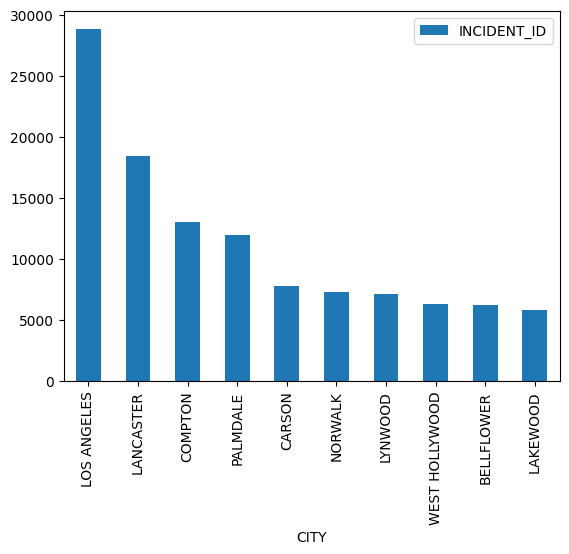

In [42]:
#Top 10 Cities with Highest Reported Crimes
cy = df.groupby(['CITY'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index().head(10)
cy.plot(x = 'CITY', y = 'INCIDENT_ID', kind = "bar")

<AxesSubplot:xlabel='GANG_RELATED'>

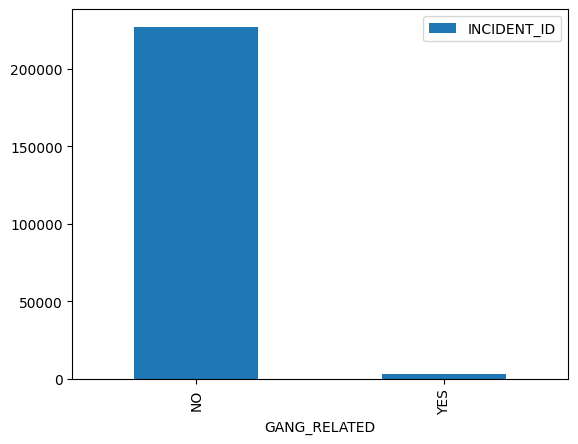

In [11]:
#Count by gang related
gang = df.groupby(['GANG_RELATED'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index().head(10)
gang.plot(x = 'GANG_RELATED', y = 'INCIDENT_ID', kind = "bar")

### Export Data

In [17]:
#Export to csv
df.to_csv('C:/Users/hanna/Documents/CSV/CRIMESDATA/LA_Crime.csv')

### Incidents outside of LA County

In [25]:
#Find zip codes outside of CA
outLA = df.loc[(df['ZIP'] < 90000) | (df['ZIP'] > 93599)]
outLA.shape

(31, 16)

<AxesSubplot:xlabel='CATEGORY'>

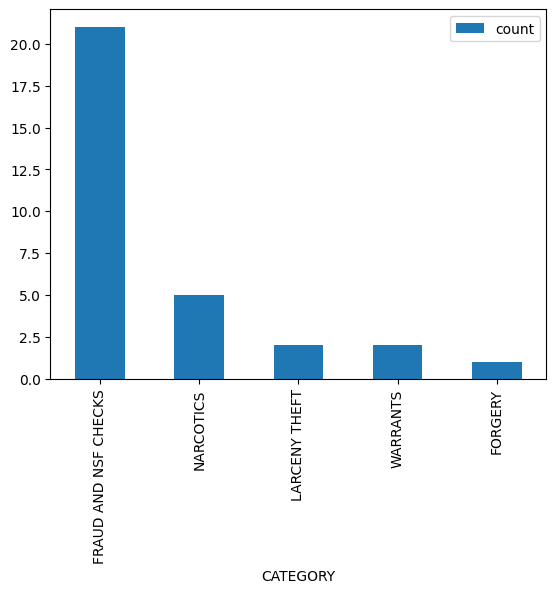

In [20]:
#Category of crimes reported that happened outside of LA county
outLA1 = outLA.groupby(['CATEGORY'])['INCIDENT_ID'].count().sort_values(ascending=False).reset_index(name="count")
outLA1.plot(x = 'CATEGORY', y = 'count', kind = "bar")